<a href="https://colab.research.google.com/github/lakshmi-rsl/Project1/blob/main/Ritvik_project(18_01_2023EDA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df_app = pd.read_csv('/content/drive/My Drive/Project_Module2/Play Store Data.csv')

In [5]:
df_rev = pd.read_csv('/content/drive/My Drive/Project_Module2/User Reviews.csv')

In [7]:
df_app.head(6)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up


In [8]:
df_rev.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


handling Duplicates

In [9]:
df_app[df_app.duplicated()].any()

App               True
Category          True
Rating            True
Reviews           True
Size              True
Installs          True
Type              True
Price             True
Content Rating    True
Genres            True
Last Updated      True
Current Ver       True
Android Ver       True
dtype: bool

Dropping the duplicates from App column

In [10]:
 df_app.drop_duplicates(subset="App", inplace=True)

In [11]:
df_app.shape

(9660, 13)

Quick Check for Outliers

On studying the dataset further, it was found that there was a data with some kind of weird anomaly. Let us find out the row in the data and purge it.

In [12]:
df_app["Rating"].unique()

array([ 4.1,  3.9,  4.7,  4.5,  4.3,  4.4,  3.8,  4.2,  4.6,  3.2,  4. ,
        nan,  4.8,  4.9,  3.6,  3.7,  3.3,  3.4,  3.5,  3.1,  5. ,  2.6,
        3. ,  1.9,  2.5,  2.8,  2.7,  1. ,  2.9,  2.3,  2.2,  1.7,  2. ,
        1.8,  2.4,  1.6,  2.1,  1.4,  1.5,  1.2, 19. ])

We have an app rating of 19 which is out of range and needs to be dropped

In [13]:
df_app[df_app["Rating"]==19]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


As we can see that this entry of our dataset is having a Rating of 19.0 which is way higher than the maximum rating of 5.0. Also, The value in the Reviews column has an alphabet which makes it a lone entry to have so. Hence we are removing this particular row to make our analysis easier.

Drop the row that has incorrect values for our features

In [14]:
index_to_drop = 10472
df_app = df_app.drop(index=index_to_drop)

In [15]:
df_app[df_app["Rating"]==19]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


4. Checks and Convert the Following columns for EDA analysis

In [16]:
df_app["Installs"].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

Remove '+' and ',' from 'Installs' to make it numeric

In [17]:
df_app["Installs"] = df_app["Installs"].apply(lambda x:x.replace("+"," ")if "+" in str(x)else x)

In [18]:
df_app["Installs"] = df_app["Installs"].apply(lambda x:x.replace(","," ")if "," in str(x)else x)

In [19]:
df_app["Installs"].unique()

array(['10 000 ', '500 000 ', '5 000 000 ', '50 000 000 ', '100 000 ',
       '50 000 ', '1 000 000 ', '10 000 000 ', '5 000 ', '100 000 000 ',
       '1 000 000 000 ', '1 000 ', '500 000 000 ', '50 ', '100 ', '500 ',
       '10 ', '1 ', '5 ', '0 ', '0'], dtype=object)

In [20]:
df_app["Installs"]=df_app["Installs"].str.replace(' ',' ')

In [21]:
df_app["Installs"]=df_app["Installs"].apply(lambda x: int(x))

ValueError: invalid literal for int() with base 10: '10 000 '

Since we get error while converting the data type of Installs column to integer, we are trying to remove '' inside the column as below

In [22]:
df_app["Installs"] = df_app["Installs"].apply(lambda x: int(x.replace(' ', '')))


In [23]:
df_app["Installs"]=df_app["Installs"].apply(lambda x: int(x))

In [24]:
df_app.describe()

,Rating,Installs
count,8196.000000,9.659000e+03
mean,4.173243,7.777507e+06
std,0.536625,5.375828e+07
min,1.000000,0.000000e+00
25%,4.000000,1.000000e+03
50%,4.300000,1.000000e+05
75%,4.500000,1.000000e+06
max,5.000000,1.000000e+09


Its understood that both Installs and ratings are now the numeric columns

Size

In [25]:
df_app["Size"].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

We need to remove 'M' and 'k' from the column and to convert them into bytes. Also we need to remove the term "Varies with device"

In [26]:
def convert_size(size):
  if isinstance(size,str):
    if 'M' in size:
      return float(size.replace('M'," "))*1024*1024
    elif 'k' in size:
      return float(size.replace('k',' '))*1024
    elif "Varies with device" in size:
      return np.nan
  return size


In [27]:
df_app["Size"] = df_app["Size"].apply(convert_size)

In [28]:
df_app.describe()

,Rating,Size,Installs
count,8196.000000,8.432000e+03,9.659000e+03
mean,4.173243,2.138560e+07,7.777507e+06
std,0.536625,2.288821e+07,5.375828e+07
min,1.000000,8.704000e+03,0.000000e+00
25%,4.000000,4.823450e+06,1.000000e+03
50%,4.300000,1.258291e+07,1.000000e+05
75%,4.500000,2.936013e+07,1.000000e+06
max,5.000000,1.048576e+08,1.000000e+09


Price & Reviews

In [29]:
df_app["Price"].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [30]:
## Remove "$" from "Price" columns to make it numeric
df_app["Price"] = df_app["Price"].apply(lambda x: x.replace("$",' ')if "$" in str(x) else(x))

In [31]:
df_app["Price"].unique()

array(['0', ' 4.99', ' 3.99', ' 6.99', ' 1.49', ' 2.99', ' 7.99', ' 5.99',
       ' 3.49', ' 1.99', ' 9.99', ' 7.49', ' 0.99', ' 9.00', ' 5.49',
       ' 10.00', ' 24.99', ' 11.99', ' 79.99', ' 16.99', ' 14.99',
       ' 1.00', ' 29.99', ' 12.99', ' 2.49', ' 10.99', ' 1.50', ' 19.99',
       ' 15.99', ' 33.99', ' 74.99', ' 39.99', ' 3.95', ' 4.49', ' 1.70',
       ' 8.99', ' 2.00', ' 3.88', ' 25.99', ' 399.99', ' 17.99',
       ' 400.00', ' 3.02', ' 1.76', ' 4.84', ' 4.77', ' 1.61', ' 2.50',
       ' 1.59', ' 6.49', ' 1.29', ' 5.00', ' 13.99', ' 299.99', ' 379.99',
       ' 37.99', ' 18.99', ' 389.99', ' 19.90', ' 8.49', ' 1.75',
       ' 14.00', ' 4.85', ' 46.99', ' 109.99', ' 154.99', ' 3.08',
       ' 2.59', ' 4.80', ' 1.96', ' 19.40', ' 3.90', ' 4.59', ' 15.46',
       ' 3.04', ' 4.29', ' 2.60', ' 3.28', ' 4.60', ' 28.99', ' 2.95',
       ' 2.90', ' 1.97', ' 200.00', ' 89.99', ' 2.56', ' 30.99', ' 3.61',
       ' 394.99', ' 1.26', ' 1.20', ' 1.04'], dtype=object)

In [32]:
df_app.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size              float64
Installs            int64
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [33]:
# Converting price column to float datatype
df_app["Price"]=df_app["Price"].apply(lambda x:float(x))

In [34]:
df_app.describe()

,Rating,Size,Installs,Price
count,8196.000000,8.432000e+03,9.659000e+03,9659.000000
mean,4.173243,2.138560e+07,7.777507e+06,1.099299
std,0.536625,2.288821e+07,5.375828e+07,16.852152
min,1.000000,8.704000e+03,0.000000e+00,0.000000
25%,4.000000,4.823450e+06,1.000000e+03,0.000000
50%,4.300000,1.258291e+07,1.000000e+05,0.000000
75%,4.500000,2.936013e+07,1.000000e+06,0.000000
max,5.000000,1.048576e+08,1.000000e+09,400.000000


In [35]:
#converting "Reviews" column to int datatype
df_app["Reviews"]=df_app["Reviews"].apply(lambda x: int(x))

In [36]:
df_app.dtypes

App                object
Category           object
Rating            float64
Reviews             int64
Size              float64
Installs            int64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [37]:
df_app.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
App,9659,9659,Photo Editor & Candy Camera & Grid & ScrapBook,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Category,9659,33,FAMILY,1832,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rating,8196.0,NaN,NaN,NaN,4.173243,0.536625,1.0,4.0,4.3,4.5,5.0
Reviews,9659.0,NaN,NaN,NaN,216592.563826,1831319.566176,0.0,25.0,967.0,29401.0,78158306.0
Size,8432.0,NaN,NaN,NaN,21385599.113472,22888209.718209,8704.0,4823449.6,12582912.0,29360128.0,104857600.0
Installs,9659.0,NaN,NaN,NaN,7777506.73227,53758278.683523,0.0,1000.0,100000.0,1000000.0,1000000000.0
Type,9658,2,Free,8902,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Price,9659.0,NaN,NaN,NaN,1.099299,16.852152,0.0,0.0,0.0,0.0,400.0
Content Rating,9659,6,Everyone,7903,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Genres,9659,118,Tools,826,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_app.describe().T

,count,mean,std,min,25%,50%,75%,max
Rating,8196.0,4.173243e+00,5.366247e-01,1.0,4.0,4.3,4.5,5.000000e+00
Reviews,9659.0,2.165926e+05,1.831320e+06,0.0,25.0,967.0,29401.0,7.815831e+07
Size,8432.0,2.138560e+07,2.288821e+07,8704.0,4823449.6,12582912.0,29360128.0,1.048576e+08
Installs,9659.0,7.777507e+06,5.375828e+07,0.0,1000.0,100000.0,1000000.0,1.000000e+09
Price,9659.0,1.099299e+00,1.685215e+01,0.0,0.0,0.0,0.0,4.000000e+02


Missing Values

In [38]:
df_app.isnull().sum()

App                  0
Category             0
Rating            1463
Reviews              0
Size              1227
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

For the 'Rating' column, you might consider filling missing values with the mean or median rating.

In [39]:
df_app['Rating'].fillna(df_app['Rating'].mean(), inplace=True)

For the 'Size' column, you could use imputation techniques. For example, you might fill missing values with the mean or median size, or use a forward or backward fill.

In [40]:
df_app['Size'].fillna(df_app['Size'].mean(), inplace=True)

If the 'Type' column has only one missing value, you might manually inspect the data and fill it with the most common type.

In [41]:
df_app['Type'].fillna(df_app['Type'].mode()[0], inplace=True)

For 'Current Ver' and 'Android Ver,' you could fill missing values with the most common version or use forward or backward fill.

In [42]:
df_app['Current Ver'].fillna(df_app['Current Ver'].mode()[0], inplace=True)
df_app['Android Ver'].fillna(df_app['Android Ver'].mode()[0], inplace=True)

**Exploratory Data Analysis (EDA)**

Plot a pairwise plot between all the quantitative variables to look for any evident patterns or relationships between the features

In [43]:
columns_of_interest = ['Rating', 'Size', 'Installs', 'Reviews']

In [44]:
subset_df = df_app[columns_of_interest]

In [45]:
subset_df = subset_df.dropna()

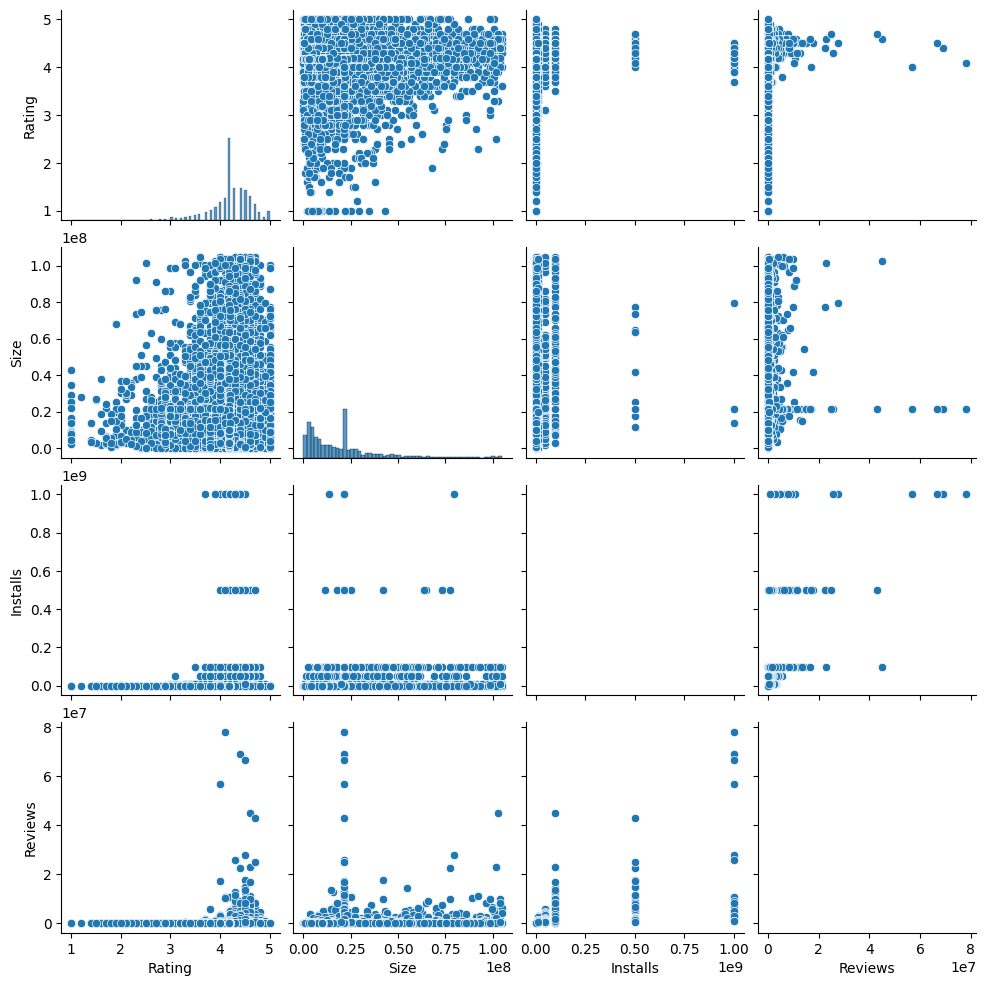

In [46]:
sns.pairplot(subset_df)
plt.show()

Is there any difference between the category column and genres?

In [47]:
df_app[["Category","Genres"]]

,Category,Genres
0,ART_AND_DESIGN,Art & Design
1,ART_AND_DESIGN,Art & Design;Pretend Play
2,ART_AND_DESIGN,Art & Design
3,ART_AND_DESIGN,Art & Design
4,ART_AND_DESIGN,Art & Design;Creativity
...,...,...
10836,FAMILY,Education
10837,FAMILY,Education
10838,MEDICAL,Medical
10839,BOOKS_AND_REFERENCE,Books & Reference


Yes, It looks like they are slightly different

1.Does the size of the app affect the ratings and number of installs?
Let's now examine app size, review and rating. For size, if the mobile app is too large, it may be difficult and/or expensive for users to download. Lengthy download times could turn users off before they even experience your mobile app. Plus, each user's device has a finite amount of disk space. For price, some users expect their apps to be free or inexpensive. These problems compound if the developing world is part of your target market; especially due to internet speeds, earning power and exchange rates.

Correlation Analysis:

Calculate the correlation coefficients between the 'Size' column and both the 'Rating' and 'Installs' columns. This will give you a numerical indication of the strength and direction of the relationship.

In [48]:
correlation_rating = df_app['Size'].corr(df_app['Rating'])
correlation_installs = df_app['Size'].corr(df_app['Installs'])

print(f'Correlation with Rating: {correlation_rating}')
print(f'Correlation with Installs: {correlation_installs}')

Correlation with Rating: 0.056598072381137766
Correlation with Installs: 0.057951381751676266


he correlation coefficients you provided indicate a very weak positive correlation between the 'Size' of the app and both the 'Rating' and 'Installs':

Correlation with Rating: 0.0566

A correlation coefficient close to 0 suggests a very weak linear relationship between the size of the app and its rating. In this case, the positive sign indicates a positive correlation, but the strength is negligible.
Correlation with Installs: 0.0579

Similarly, the correlation with installs is also very weak and positive. This suggests a slight positive association between the size of the app and the number of installs, but again, the relationship is weak.
In practical terms, these correlation coefficients suggest that there isn't a strong linear relationship between the size of the app and either its rating or the number of installs. However, it's essential to note that correlation does not imply causation. Other factors not considered in this analysis could influence app ratings and installs.

Additionally, the relationship might be nonlinear, or there could be confounding variables that impact the results. Further exploration, including visualizations and possibly statistical modeling, may provide more insights into the complex relationship between app size, ratings, and installs.








Visualization:

Create scatter plots to visualize the relationship between 'Size' and 'Rating' and between 'Size' and 'Installs'.

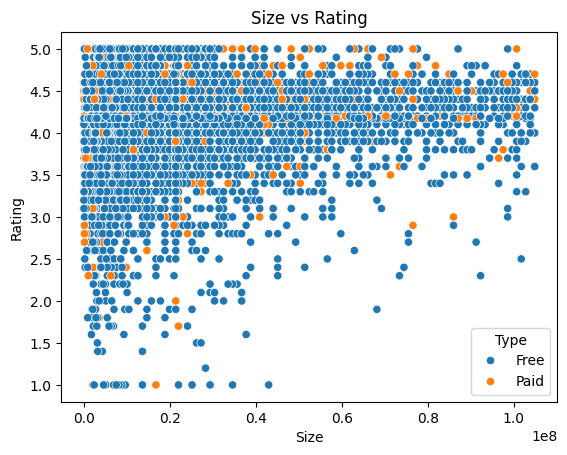

In [49]:
# Scatter plot for Size vs Rating
sns.scatterplot(x='Size', y='Rating', hue = 'Type', data=df_app)
plt.title('Size vs Rating')
plt.show()

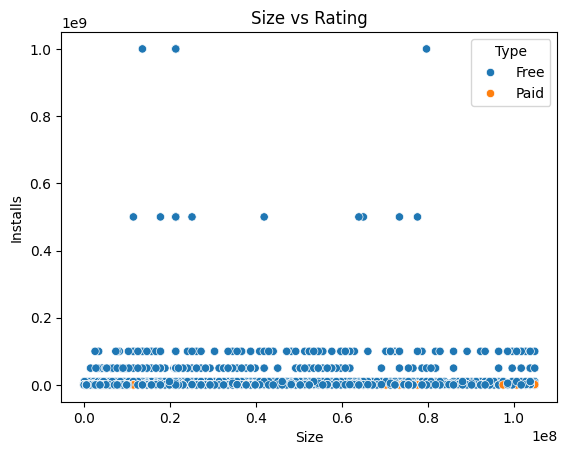

In [50]:
# Scatter plot for Size vs Installs
sns.scatterplot(x='Size',y="Installs",hue="Type",data=df_app)
plt.title('Size vs Rating')
plt.show()

What are the different categories of Apps downloaded?

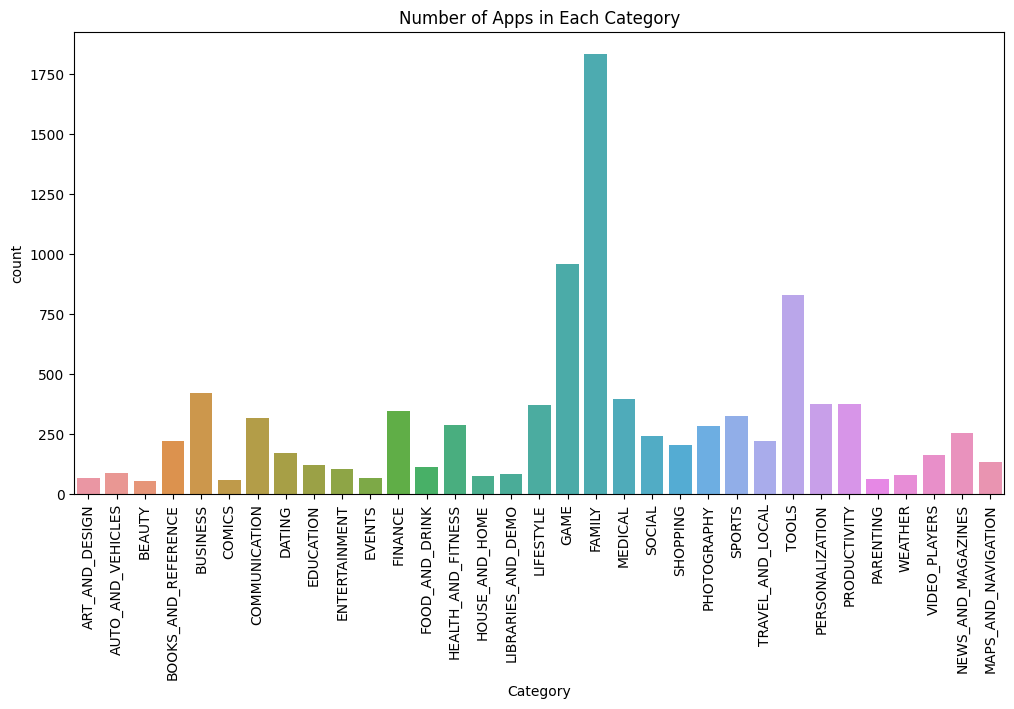

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Category', data=df_app)
plt.xticks(rotation=90)
plt.title('Number of Apps in Each Category')
plt.show()

Box Plots for Ratings by Category:

Use box plots to compare the distribution of ratings for different app categories. This can help identify categories with higher or lower average ratings.

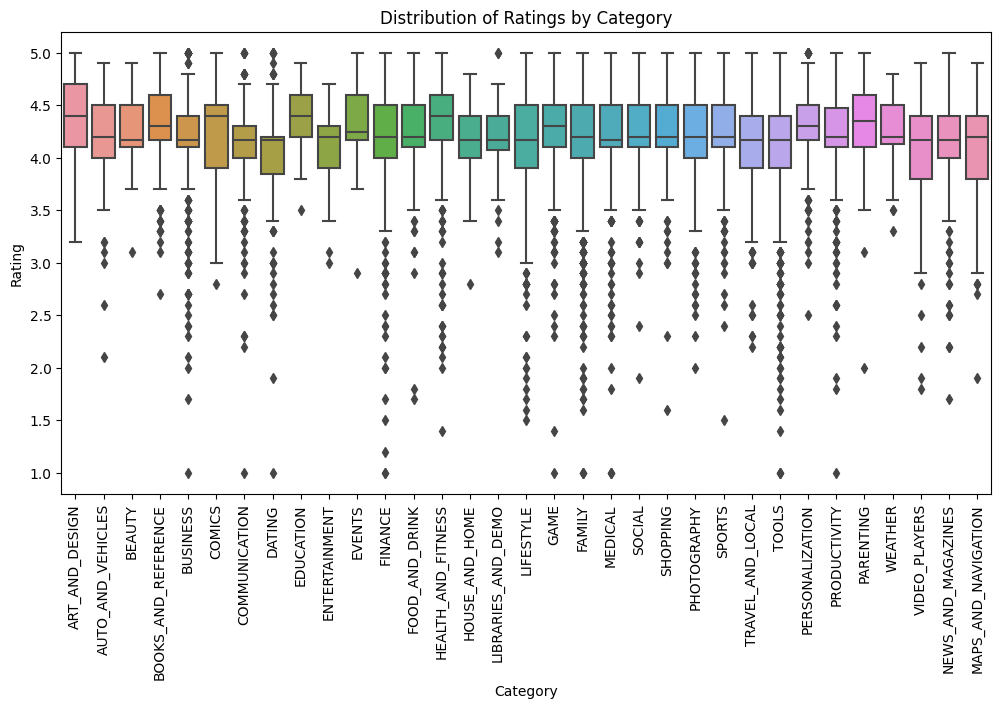

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Category', y='Rating', data=df_app)
plt.xticks(rotation=90)
plt.title('Distribution of Ratings by Category')
plt.show()

In [55]:
app_counts= df_app["Type"].value_counts()
app_counts

Free    8903
Paid     756
Name: Type, dtype: int64

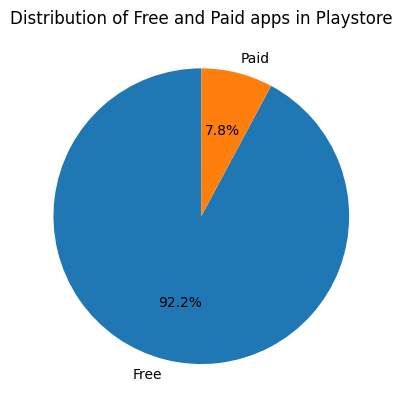

In [56]:
plt.pie(app_counts, labels = app_counts.index,autopct='%1.1f%%', startangle = 90)
plt.title("Distribution of Free and Paid apps in Playstore")
plt.show()

1. which is the most downloaded app in each category?

In [57]:
df_app.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [58]:
df_app["Installs"]

0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10836        5000
10837         100
10838        1000
10839        1000
10840    10000000
Name: Installs, Length: 9659, dtype: int64

In [60]:
sorted_data = df_app.sort_values(by=['Category','Installs'],ascending =False)
sorted_data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
3626,The Weather Channel: Rain Forecast & Storm Alerts,WEATHER,4.400000,1558437,2.138560e+07,50000000,Free,0.00,Everyone,Weather,"August 1, 2018",Varies with device,Varies with device
3628,AccuWeather: Daily Forecast & Live Weather Rep...,WEATHER,4.400000,2053404,2.138560e+07,50000000,Free,0.00,Everyone,Weather,"August 6, 2018",Varies with device,Varies with device
3649,"GO Weather - Widget, Theme, Wallpaper, Efficient",WEATHER,4.500000,1422858,2.138560e+07,50000000,Free,0.00,Everyone,Weather,"August 3, 2018",Varies with device,Varies with device
4725,Weather & Clock Widget for Android,WEATHER,4.400000,2371543,1.153434e+07,50000000,Free,0.00,Everyone,Weather,"June 4, 2018",5.9.4.0,4.0.3 and up
3630,"Weather by WeatherBug: Forecast, Radar & Alerts",WEATHER,4.500000,981995,2.138560e+07,10000000,Free,0.00,Everyone,Weather,"June 7, 2018",Varies with device,Varies with device
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4193,صور حرف H,ART_AND_DESIGN,4.400000,13,4.718592e+06,1000,Free,0.00,Everyone,Art & Design,"March 27, 2018",2.0,4.0.3 and up
4764,X Launcher Prime: With OS Style Theme & No Ads,ART_AND_DESIGN,4.700000,149,3.670016e+06,1000,Paid,1.99,Everyone,Art & Design,"July 30, 2018",1.2.2,4.1 and up
5258,AJ Styles Wallpaper 2018 - AJ Styles HD Wallpaper,ART_AND_DESIGN,4.000000,18,3.774874e+06,1000,Free,0.00,Everyone,Art & Design,"March 22, 2018",1.1,4.0 and up
8888,Spring flowers theme couleurs d t space,ART_AND_DESIGN,5.000000,1,3.040870e+06,100,Free,0.00,Everyone,Art & Design,"April 18, 2018",1.0.2,4.0 and up


In [61]:
top_apps = sorted_data.groupby('Category').head(1)

In [64]:
print(top_apps[["Category","App","Installs"]])

                 Category                                                App  \
3626              WEATHER  The Weather Channel: Rain Forecast & Storm Alerts   
3665        VIDEO_PLAYERS                                            YouTube   
3117     TRAVEL_AND_LOCAL                          Maps - Navigate & Explore   
3234                TOOLS                                             Google   
4054               SPORTS                                         3D Bowling   
2544               SOCIAL                                           Facebook   
2655             SHOPPING                           Wish - Shopping Made Fun   
3454         PRODUCTIVITY                                       Google Drive   
2808          PHOTOGRAPHY                                      Google Photos   
3354      PERSONALIZATION                      ZEDGE™ Ringtones & Wallpapers   
7229            PARENTING     Pregnancy Tracker & Countdown to Baby Due Date   
3736   NEWS_AND_MAGAZINES               

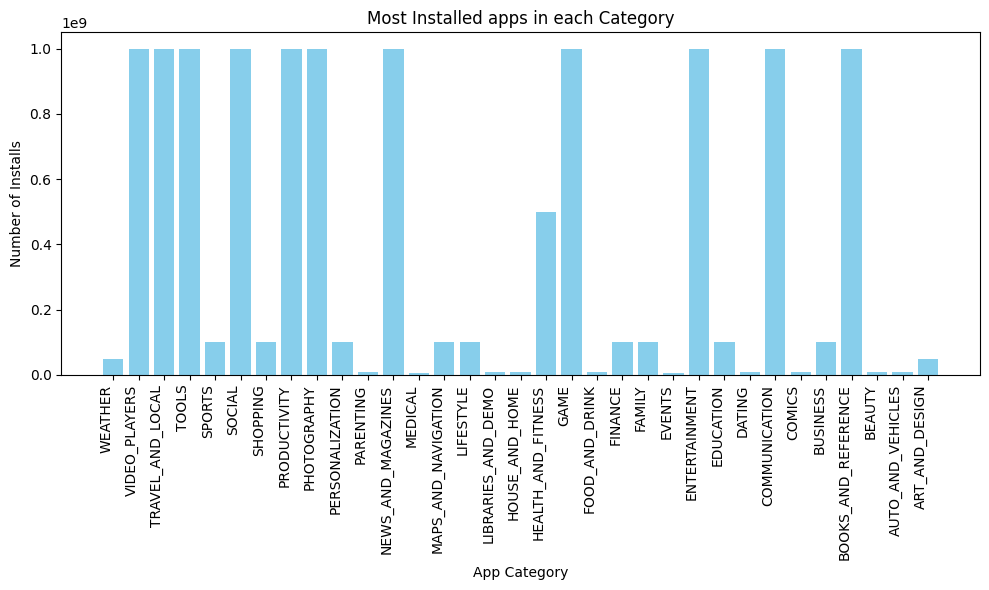

In [69]:
plt.figure(figsize=(10,6))
plt.bar(top_apps['Category'], top_apps["Installs"],color='skyblue')
plt.xlabel("App Category")
plt.ylabel("Number of Installs")
plt.title("Most Installed apps in each Category")
plt.xticks(rotation =90, ha='right')
plt.tight_layout()
plt.show()

In [70]:
sorted_data_asc = df_app.sort_values(by=['Category','Installs'],ascending =True)

In [71]:
Least_Installed_apps = sorted_data.groupby('Category').head(1)

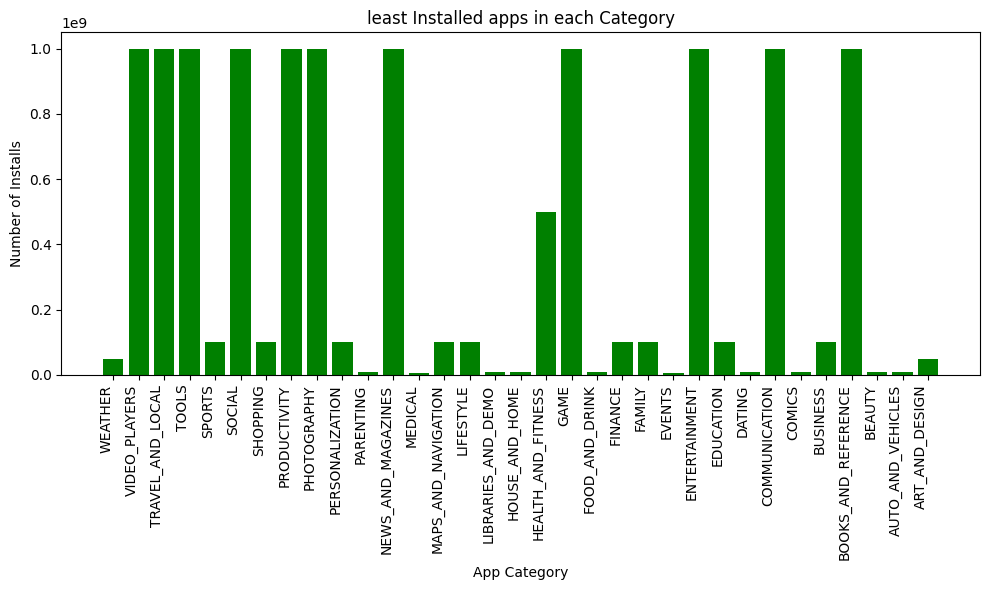

In [73]:
plt.figure(figsize=(10,6))
plt.bar(Least_Installed_apps["Category"], Least_Installed_apps["Installs"], color='green')
plt.xlabel("App Category")
plt.ylabel("Number of Installs")
plt.title("least Installed apps in each Category")
plt.xticks(rotation =90, ha='right')
plt.tight_layout()
plt.show()